In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [14]:
# Now we need to read in the data
df = pd.read_excel(r'C:\Users\Hakim\Downloads\les-titres-les-plus-pretes_1.xlsx')
df

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
0,1.0,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,11.0,Livre jeunesse,1019,Max et Lili ont peur des images violentes,"Saint-Mars, Dominique de",51,4522,1407,119
2,53.0,Bande dessinée jeunesse,804,"Poux, papous et pas papous","Cohen, Jacqueline",50,7158,1142,100
3,126.0,Livre jeunesse,700,Max et Lili sont malades,"Saint-Mars, Dominique de",37,4701,845,72
4,140.0,Bande dessinée jeunesse,683,Coeur du passé,"Sobral, Patrick",50,5057,905,85
...,...,...,...,...,...,...,...,...,...
820,739.0,Bande dessinée jeunesse,361,Madame Minuscule,"Fraipont, Céline",40,606,208,45
821,773.0,Bande dessinée jeunesse,355,One Piece : édition originale. 82. Un monde en...,"Oda, Eiichirō",46,643,254,52
822,776.0,Bande dessinée jeunesse,355,Définitivement nuisible,Bertschy,43,2494,513,48
823,805.0,Bande dessinée jeunesse,348,Amour glacé,"Fraipont, Céline",45,2945,455,50


In [15]:
#LEt's see if there is any missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Rang - 0.0%
Type de document - 0.0%
Prêts - 0.0%
Titre - 0.0%
Auteur - 0.044848484848484846%
Nombre de localisations - 0.0%
Nombre de prêt total - 0.0%
Nombre de prêts 2017 - 0.0%
Nombre d'exemplaires - 0.0%


In [20]:
# Fill missing values with the most frequent value of that column

df=df.fillna(df.mode().iloc[0])
df

,Rang,Type de document,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
0,1.0,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,11.0,Livre jeunesse,1019,Max et Lili ont peur des images violentes,"Saint-Mars, Dominique de",51,4522,1407,119
2,53.0,Bande dessinée jeunesse,804,"Poux, papous et pas papous","Cohen, Jacqueline",50,7158,1142,100
3,126.0,Livre jeunesse,700,Max et Lili sont malades,"Saint-Mars, Dominique de",37,4701,845,72
4,140.0,Bande dessinée jeunesse,683,Coeur du passé,"Sobral, Patrick",50,5057,905,85
...,...,...,...,...,...,...,...,...,...
820,739.0,Bande dessinée jeunesse,361,Madame Minuscule,"Fraipont, Céline",40,606,208,45
821,773.0,Bande dessinée jeunesse,355,One Piece : édition originale. 82. Un monde en...,"Oda, Eiichirō",46,643,254,52
822,776.0,Bande dessinée jeunesse,355,Définitivement nuisible,Bertschy,43,2494,513,48
823,805.0,Bande dessinée jeunesse,348,Amour glacé,"Fraipont, Céline",45,2945,455,50


In [21]:
#Testing if still missing data on Auteur Column
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Rang - 0.0%
Type de document - 0.0%
Prêts - 0.0%
Titre - 0.0%
Auteur - 0.0%
Nombre de localisations - 0.0%
Nombre de prêt total - 0.0%
Nombre de prêts 2017 - 0.0%
Nombre d'exemplaires - 0.0%


In [22]:
# Data Types for our columns

df.dtypes

Rang                       float64
Type de document            object
Prêts                        int64
Titre                       object
Auteur                      object
Nombre de localisations      int64
Nombre de prêt total         int64
Nombre de prêts 2017         int64
Nombre d'exemplaires         int64
dtype: object

In [23]:
#Change data types of columns

df['Rang']=df['Rang'].astype('int64')

In [41]:
df=df.sort_values(by=['Nombre de prêt total'],inplace=False,ascending=False)

In [30]:
pd.set_option('display.max_rows',None)

In [31]:
#Drop any duplicates
df['Titre'].sort_values(ascending=False)


637                                                   Ör
336                                    Ça va dégominer !
525                               Ça sent les vacances !
449                               Ça sent la croquette !
572                [Images animées] : Les trois brigands
770                                          Zéro réseau
14                                          Yes, I can !
22                          Yakari et la tueuse des mers
309                                         Waterminator
169                                            Watergate
291                                        Walking blork
639                                      Vroum ! Vroum !
383                                          Vole-mouton
253                                  Vol 714 pour Sydney
508                              Vivement les vacances !
134                                 Vie de David Hockney
758                                           Vice-Versa
265                            

In [33]:
df['Titre']=df['Titre'].drop_duplicates()

In [34]:
# Nombre Exemplaire Higher Correlation
# Pret Total High Correlation



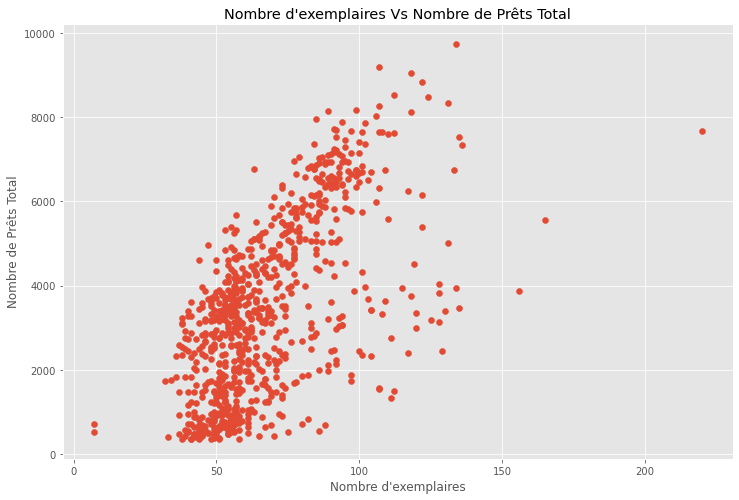

In [43]:
#Scatter plot with Nombre Exemplaire vs Total Pret

plt.scatter(x=df["Nombre d'exemplaires"],y=df['Nombre de prêt total'])

plt.title("Nombre d'exemplaires Vs Nombre de Prêts Total")

plt.xlabel("Nombre d'exemplaires")
plt.ylabel("Nombre de Prêts Total")

plt.show()

<AxesSubplot:xlabel="Nombre d'exemplaires", ylabel='Nombre de prêt total'>

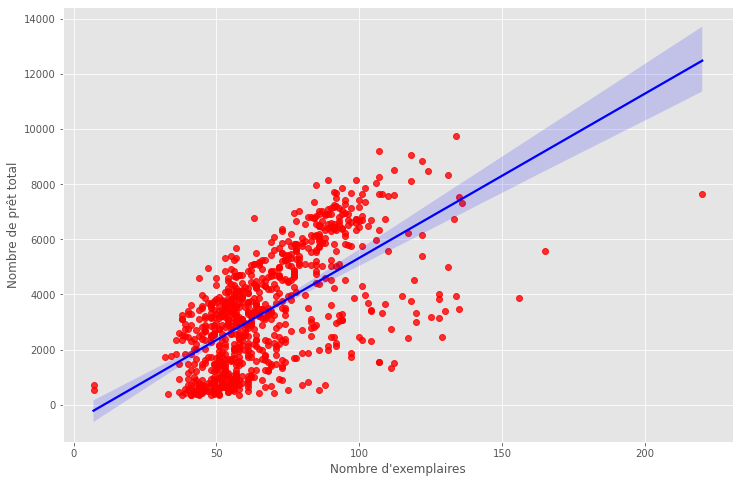

In [45]:
# Plot Nombre Exemplaire vs Total Pret
 
sns.regplot(x="Nombre d'exemplaires",y='Nombre de prêt total',
            data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [46]:
df.corr()

,Rang,Prêts,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
Rang,1.000000,-0.915945,-0.283846,-0.600655,-0.685908,-0.630483
Prêts,-0.915945,1.000000,0.284731,0.627521,0.763236,0.717956
Nombre de localisations,-0.283846,0.284731,1.000000,0.058012,0.182459,0.497839
Nombre de prêt total,-0.600655,0.627521,0.058012,1.000000,0.784249,0.629505
Nombre de prêts 2017,-0.685908,0.763236,0.182459,0.784249,1.000000,0.654328
Nombre d'exemplaires,-0.630483,0.717956,0.497839,0.629505,0.654328,1.000000
